In [12]:
# 라이브러리 import
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

### Step 1. SentencePiece 설치하기

SentencePiece는 Google에서 제공하는 오픈소스 기반 Sentence Tokenizer/Detokenizer 로서, BPE와 unigram 2가지 subword 토크나이징 모델 중 하나를 선택해서 사용할 수 있도록 패키징한 것

In [ ]:
# ! pip install sentencepiece

### Step 2. SentencePiece 모델 학습

In [3]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


- 데이터 사이즈는 94123개가 포함되어 있음
- 문장의 길이를 확인하여 데이터를 얼마나 사용할지 결정

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


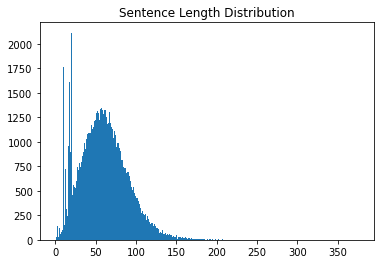

In [4]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [5]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


- 길이 1 짜리 문장은 노이즈 데이터
- 추가 확인 진행

In [6]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [7]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

- 중복에 대한 처리가 안되어 있는 것을 확인
- set을 이용해서 중복된 요소 제거

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


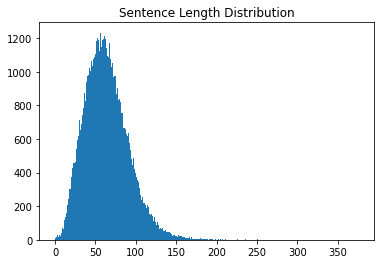

In [8]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

- 데이터의 개수가 17000개 가량 줄어 77591개가 되었음
- 후에 미니 배치를 만들 것을 생각하면 가장 긴 데이터를 기준으로 padding처리해야 해서 연산 측면에서 비효율적
- 길이 10 미만 데이터는 제거

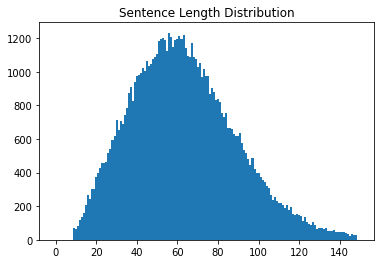

In [9]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

### 공백 기반 토큰화
- 정제된 데이터 filtered_corpus를 공백 기반으로 토큰화하여 리스트 split_corpus에 저장한 후, 아래 tokenize() 함수를 사용해 단어 사전과 Tensor 데이터를 얻음
- 단어 사전의 크기 확인

In [10]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [11]:
# 정제된 데이터 filtered_corpus를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요.
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [15]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 376816 Dec 27 02:39 korean_spm.model
-rw-r--r-- 1 root root 146213 Dec 27 02:39 korean_spm.vocab


In [16]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3608, 11, 287, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


### 형태소 기반 토큰화

- 한국어 형태소 분석기는 대표적으로 Khaiii와 KoNLPy가 사용됨 

- KoNLPy 중 가장 성능이 준수한 MeCab클래스를 활용

In [15]:
# mecab.morphs()를 사용해서 형태소분석을 합니다.
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [16]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


- 공백 기반 단어 사전에 비해 단어 수가 현저히 줄어든 것을 확인
- 단어 수 감소는 연산량의 감소로 이어져 더 빠른 학습을 가능케 하고, 
- 모델이 튜닝해야 하는 매개변수(Parameter) 수가 줄어들어 학습도 더 잘 됨
- 한국어 처리할 때는 공백 기반 토큰화를 절대 지양해야 함

- 모델이 생성한 Tensor를 문장으로 Decoding하는 과정
    - tokenizer.sequences_to_texts() 함수를 사용하여 Decoding
    - tokenizer.index_word 를 사용하여 Decoding
- mecab_tensor[100] 을 원문으로 되돌려 봄

In [17]:
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

상담 을 위해 누구 를 직접 만나 서 문의 하 지 않 아도 되 고 상담 해 주 는 사람 들 의 견해 가 어떻 든 이 에 대해 불안해할 필요 도 없 다 .


In [18]:
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

상담 을 위해 누구 를 직접 만나 서 문의 하 지 않 아도 되 고 상담 해 주 는 사람 들 의 견해 가 어떻 든 이 에 대해 불안해할 필요 도 없 다 . 


### Step 3. Tokenizer 함수 작성
-  훈련시킨 SentencePiece를 활용하여 위 함수와 유사한 기능을 하는 sp_tokenize() 함수를 정의

    1. 매개변수로 토큰화된 문장의 list를 전달하는 대신 온전한 문장의 list 를 전달

    2. 생성된 vocab 파일을 읽어와 { <word> : <idx> } 형태를 가지는 word_index 사전과 { <idx> : <word>} 형태를 가지는 index_word 사전을 생성하고 함께 반환

    3. 리턴값인 tensor 는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장입니다. 바로 학습에 사용할 수 있게 Padding 적용

In [ ]:
def sp_tokenize(s, corpus): 

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

### Step 4. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기

**네이버 영화 리뷰 데이터 다운로드**

In [ ]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

**네이버 영화 리뷰 데이터 읽기**

In [49]:
import pandas as pd
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [97]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력
print('test 데이터 사이즈:', len(test_data)) # 테스트용 리뷰 개수 출력

훈련용 리뷰 개수 : 146182
test 데이터 사이즈: 49157


In [98]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


**네이버 영화 리뷰 데이터 전처리**

In [99]:
# NULL 값 확인
print(train_data.isnull().values.any())

False


In [100]:
import re 

def has_non_korean_in_column(column):
    # 정규표현식을 사용하여 한글 이외의 문자 판별
    non_korean_pattern = re.compile('[^ㄱ-ㅎㅏ-ㅣ가-힣]+')

    for text in column:
        if pd.notna(text) and non_korean_pattern.search(str(text)):
            return True  # 한글 이외의 문자가 발견되면 True 반환

    return False  # 모든 텍스트가 한글이거나 null인 경우 False 반환


# 각 열에 대해 확인
for column in train_data.columns:
    if has_non_korean_in_column(train_data[column]):
        print(f"{column}: 한글 이외의 문자가 존재합니다.")
    else:
        print(f"{column}: 모든 텍스트는 한글입니다.")    

id: 한글 이외의 문자가 존재합니다.
document: 한글 이외의 문자가 존재합니다.
label: 한글 이외의 문자가 존재합니다.


In [101]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/tmp/ipykernel_1779/1812058932.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/tmp/ipykernel_1779/1812058932.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [102]:
train_data.drop_duplicates(subset=['document'], inplace=True)
train_data = train_data.dropna(how = 'any') 
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data = test_data.dropna(how = 'any') 

print('train 데이터 사이즈:', len(train_data))
print('test 데이터 사이즈:', len(test_data))

train 데이터 사이즈: 143682
test 데이터 사이즈: 48418


In [103]:
data = list(train_data['document']) + list(test_data['document'])

print("Data Size:", len(data))

print("Example:")
for sen in data[0:100][::20]: print(">>", sen)

Data Size: 192100
Example:
>> 아 더빙 진짜 짜증나네요 목소리
>> 나름 심오한 뜻도 있는 듯 그냥 학생이 선생과 놀아나는 영화는 절대 아님
>> 단순하면서 은은한 매력의 영화
>> 보는내내 그대로 들어맞는 예측 카리스마 없는 악역
>> 뭐냐시작하고 분만에 나왔다 리플릿 사진 보며 불안하더니만


문장의 최단 길이: 0
문장의 최장 길이: 140
문장의 평균 길이: 33


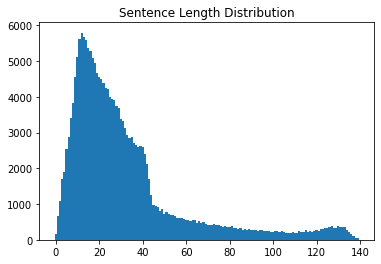

In [104]:
min_len = 999
max_len = 0
sum_len = 0

for sen in data:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(data))

sentence_length = np.zeros((max_len), dtype=int)

for sen in data:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [105]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in data:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

print('문장의 최단 길이')
check_sentence_with_length(data, 1)
print('  ')
print('문장의 최장 길이')
check_sentence_with_length(data, 144)

문장의 최단 길이
아
점
잼
즐
끙
와
굿
 
기
짱
휴
야
음
ㅎ
ㅋ
굳
하
네
ㅇ
등
ㅠ
우
쒯
쩝
토
똥
흠
류
헐
삼
꽝
풉
ㅅ
왜
ㄴ
쉣
좇
봐
까
뿌
ㅜ
자
참
ㅁ
ㅉ
흥
찜
귯
린
후
시
ㅗ
웅
ㅣ
오
쩜
허
뀼
넌
빠
애
헝
쨩
움
켁
엥
ㄳ
업
헉
군
올
걍
뷁
좀
멍
쀍
뭐
로
ㄹ
ㅂ
갑
욱
즛
킥
함
진
읭
ㅡ
잠
풋
곧
ㅍ
ㅏ
엄
닥
꽤
캬
ㅆ
ㄵ
ㄱ
파
  
문장의 최장 길이


In [106]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 4
Outlier Index: 5
Outlier Index: 6
Outlier Index: 7
Outlier Index: 8
Outlier Index: 9
Outlier Index: 10
Outlier Index: 11
Outlier Index: 12
Outlier Index: 13
Outlier Index: 14
Outlier Index: 15
Outlier Index: 16
Outlier Index: 17
Outlier Index: 18
Outlier Index: 19
Outlier Index: 20
Outlier Index: 21
Outlier Index: 22
Outlier Index: 23
Outlier Index: 24
Outlier Index: 25
Outlier Index: 26
Outlier Index: 27
Outlier Index: 28
Outlier Index: 29
Outlier Index: 30
Outlier Index: 31
Outlier Index: 32
Outlier Index: 33
Outlier Index: 34
Outlier Index: 35
Outlier Index: 36
Outlier Index: 37
Outlier Index: 38
Outlier Index: 39
Outlier Index: 40
Outlier Index: 41
Outlier Index: 42
Outlier Index: 43
Outlier Index: 44


In [107]:
check_sentence_with_length(data, 4)

재밋는뎅
킬링타임
아 빵점
연기 굿
좋은영화
굿 좋아
신선하네
재밌는데
    
ㄵ 점대
절대비추
구우우웃
펑점조절
지루하다
억지억지
목포 붹
패륜영화
좋은니다
재미없다
점만들자
괜히봤다
재미없음
시시하다
완벽하다
장난치냐
몰떡몰떡
이건뭥미
잼슴ㅇㅎ
짠하네요
기대된디
실망이다
보고싶다
볼만해요
사랑한다
감동ㅜㅜ
나도별로
뭥미 헐
추억돋네
좋았어요
재밌어요
어이상실
볼만했음
평점조절
별로네요
자자자자
재밋어요
잼있어요
돈아깝다
미치겠다
알파치노
명작ㅎㅎ
어이없다
재밌나여
눈물나다
굿입니당
옥빈님짱
과연ㅋㅋ
넌센스다
피크타임
아들은 
재밌었죠
중국이지
시시하네
따분하다
언제꺼임
화가난다
별로였음
뭐냐이게
개쩔었다
그지같다
재미없네
안무섭다
훈훈하당
아임낫뎃
푹 잤음
재밌네요
별로던데
괜찬았음
안과 겉
참쩔어요
재 밌다
좋습니다
괜찬군요
재밌네 
걍 평작
짜증나서
괜찮았음
명작이다
재밋구만
공블리짱
이정시러
ㅡㅡ 네
코믹인가
잼나ㅎㅎ
완전좋아
으하하하
그만하자
그럭저럭
재미없따
잼 없음
보지마요


Data Size: 191074
문장의 최단 길이: 0
문장의 최장 길이: 140
문장의 평균 길이: 33


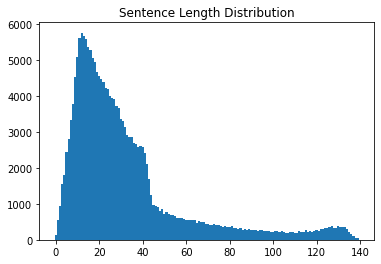

In [108]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(data))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

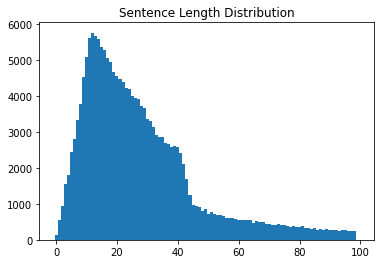

In [109]:
max_len = 100
min_len = 1

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

### 네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기

In [110]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=naver_review_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

!ls -l naver_review_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=naver_review_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: naver_review_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab

-rw-r--r-- 1 root root 378085 Dec 27 06:59 naver_review_spm.model
-rw-r--r-- 1 root root 147373 Dec 27 06:59 naver_review_spm.vocab


In [111]:
s = spm.SentencePieceProcessor()
s.Load('naver_review_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1340, 8, 385, 11, 1181, 8, 134, 13, 0]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다 ⁇ 


### 학습된 모델로 sp_tokenize() 메소드 구현하기

In [112]:
# SentencePiece 모델을 사용하여 한국어 텍스트를 토큰화하는 함수인 sp_tokenize를 정의
def sp_tokenize(s, corpus): 

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./naver_review_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre', maxlen = 100)

    return tensor, word_index, index_word

In [113]:
# 위에서 정의한 sp_tokenize 함수를 사용하여 데이터를 토큰화하고 인덱싱
tensor, word_index, index_word = sp_tokenize(s, data)
print(tensor.shape)

(192100, 100)


### 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기

In [114]:
# 데이터 분할
X_train = tensor[:143682] 
X_test = tensor[143682:] # 146182 : 정규화 안했을때

y_train = np.array(list(train_data['label']))
y_test = np.array(list(test_data['label']))

# validation set 50000건 분리
X_val = X_train[:50000]   
y_val = y_train[:50000]

# validation set을 제외한 나머지 
partial_X_train = X_train[50000:]  
partial_y_train = y_train[50000:]

print(partial_X_train.shape)
print(partial_y_train.shape)
print(train_data.shape)
print(X_train.shape)
print(y_train.shape)

(93682, 100)
(93682,)
(143682, 3)
(143682, 100)
(143682,)


In [115]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))  
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력 : 긍정/부정

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [116]:
# 모델 훈련
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=5

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/5
183/183 [==============================] - 3s 10ms/step - loss: 0.5602 - accuracy: 0.7422 - val_loss: 0.3856 - val_accuracy: 0.8367
Epoch 2/5
183/183 [==============================] - 1s 8ms/step - loss: 0.3540 - accuracy: 0.8502 - val_loss: 0.3577 - val_accuracy: 0.8449
Epoch 3/5
183/183 [==============================] - 1s 8ms/step - loss: 0.3241 - accuracy: 0.8654 - val_loss: 0.3560 - val_accuracy: 0.8455
Epoch 4/5
183/183 [==============================] - 1s 8ms/step - loss: 0.3130 - accuracy: 0.8703 - val_loss: 0.3565 - val_accuracy: 0.8458
Epoch 5/5
183/183 [==============================] - 1s 8ms/step - loss: 0.3067 - accuracy: 0.8735 - val_loss: 0.3584 - val_accuracy: 0.8447


In [117]:
# 정규화를 진행 했을 때의 모델 성능 
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1514/1514 - 4s - loss: 0.3705 - accuracy: 0.8411
[0.3705178201198578, 0.8411127924919128]


In [118]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


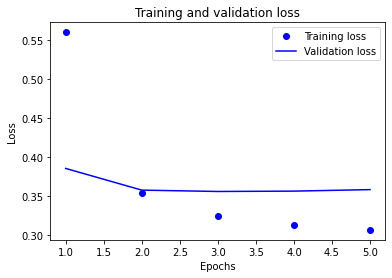

In [119]:
# loss 시각화

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

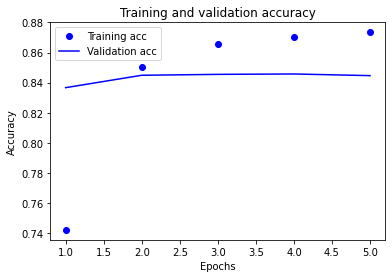

In [120]:
# accuracy 시각화
plt.clf()   # 그림을 초기화

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기
- KoNLPy 중 가장 성능이 준수한 MeCab클래스를 활용

In [137]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [172]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre', maxlen = 100)
    return tensor, tokenizer

In [173]:
# mecab.morphs()를 사용해서 형태소분석을 합니다.
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for sen in filtered_corpus:
    mecab_corpus.append(mecab_split(sen))

In [174]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 51162


In [175]:
# 데이터 분할
X_train = tensor[:143682] 
X_test = tensor[143682:] # 146182 : 정규화 안했을때

y_train = np.array(list(train_data['label']))
y_test = np.array(list(test_data['label']))

# validation set 50000건 분리
X_val = X_train[:50000]   
y_val = y_train[:50000]

# validation set을 제외한 나머지 
partial_X_train = X_train[50000:]  
partial_y_train = y_train[50000:]

print(partial_X_train.shape)
print(partial_y_train.shape)
print(train_data.shape)
print(X_train.shape)
print(y_train.shape)

(93682, 100)
(93682,)
(143682, 3)
(143682, 100)
(143682,)


In [176]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))  
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력 : 긍정/부정

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
lstm_14 (LSTM)               (None, 8)                 800       
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [177]:
# 모델 훈련
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=5

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/5
183/183 [==============================] - 4s 11ms/step - loss: 0.5545 - accuracy: 0.7543 - val_loss: 0.3853 - val_accuracy: 0.8382
Epoch 2/5
183/183 [==============================] - 2s 8ms/step - loss: 0.3524 - accuracy: 0.8510 - val_loss: 0.3559 - val_accuracy: 0.8461
Epoch 3/5
183/183 [==============================] - 2s 8ms/step - loss: 0.3227 - accuracy: 0.8651 - val_loss: 0.3561 - val_accuracy: 0.8452
Epoch 4/5
183/183 [==============================] - 2s 9ms/step - loss: 0.3128 - accuracy: 0.8693 - val_loss: 0.3558 - val_accuracy: 0.8458
Epoch 5/5
183/183 [==============================] - 2s 8ms/step - loss: 0.3060 - accuracy: 0.8726 - val_loss: 0.3565 - val_accuracy: 0.8452


In [178]:
# 정규화를 진행 했을 때의 모델 성능 
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1514/1514 - 4s - loss: 0.3685 - accuracy: 0.8410
[0.36849361658096313, 0.8409888744354248]


In [169]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


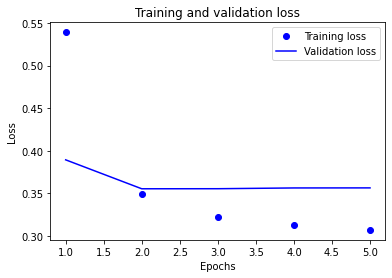

In [170]:
# loss 시각화

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

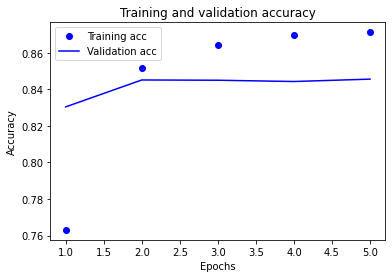

In [171]:
# accuracy 시각화
plt.clf()   # 그림을 초기화

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기

In [180]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
        f.write(str(row) + '\n')

# --model_type = 'bpe'
spm.SentencePieceTrainer.Train(
    '--input={} --model_type=bpe --model_prefix=naver_review_spm_bpe --vocab_size={}'.format(temp_file, vocab_size)    
)

!ls -l naver_review_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_type=bpe --model_prefix=naver_review_spm_bpe --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: naver_review_spm_bpe
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_lim

-rw-r--r-- 1 root root 373588 Dec 27 07:52 naver_review_spm_bpe.model
-rw-r--r-- 1 root root 118784 Dec 27 07:52 naver_review_spm_bpe.vocab
-rw-r--r-- 1 root root 378085 Dec 27 06:59 naver_review_spm.model
-rw-r--r-- 1 root root 147373 Dec 27 06:59 naver_review_spm.vocab


In [181]:
# sentencepiece 모델이 잘 적용됐는지 확인해보기
s_bpe = spm.SentencePieceProcessor() 
s_bpe.Load('naver_review_spm_bpe.model') # bpe 타입 model

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s_bpe.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s_bpe.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s_bpe.DecodeIds(tokensIDs))

[4693, 857, 6696, 6446, 1378, 6442, 6539, 6436, 0]
['▁아버', '지가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다 ⁇ 


In [183]:
tensor_bpe, word_index_bpe, index_word_bpe = sp_tokenize(s_bpe, data)
print(tensor_bpe.shape)

(192100, 100)


In [184]:
# 데이터 분할
X_train = tensor[:143682] 
X_test = tensor[143682:] # 146182 : 정규화 안했을때

y_train = np.array(list(train_data['label']))
y_test = np.array(list(test_data['label']))

# validation set 50000건 분리
X_val = X_train[:50000]   
y_val = y_train[:50000]

# validation set을 제외한 나머지 
partial_X_train = X_train[50000:]  
partial_y_train = y_train[50000:]

print(partial_X_train.shape)
print(partial_y_train.shape)
print(train_data.shape)
print(X_train.shape)
print(y_train.shape)

(93682, 100)
(93682,)
(143682, 3)
(143682, 100)
(143682,)


In [185]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))  
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력 : 긍정/부정

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
lstm_15 (LSTM)               (None, 8)                 800       
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [186]:
# 모델 훈련
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=5

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/5
183/183 [==============================] - 4s 12ms/step - loss: 0.5730 - accuracy: 0.7175 - val_loss: 0.4340 - val_accuracy: 0.8313
Epoch 2/5
183/183 [==============================] - 2s 9ms/step - loss: 0.3728 - accuracy: 0.8486 - val_loss: 0.3652 - val_accuracy: 0.8437
Epoch 3/5
183/183 [==============================] - 2s 8ms/step - loss: 0.3290 - accuracy: 0.8636 - val_loss: 0.3577 - val_accuracy: 0.8465
Epoch 4/5
183/183 [==============================] - 2s 9ms/step - loss: 0.3145 - accuracy: 0.8702 - val_loss: 0.3580 - val_accuracy: 0.8459
Epoch 5/5
183/183 [==============================] - 2s 9ms/step - loss: 0.3062 - accuracy: 0.8746 - val_loss: 0.3562 - val_accuracy: 0.8456


In [187]:
# 정규화를 진행 했을 때의 모델 성능 
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1514/1514 - 4s - loss: 0.3666 - accuracy: 0.8421
[0.3665814995765686, 0.8421248197555542]


In [188]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


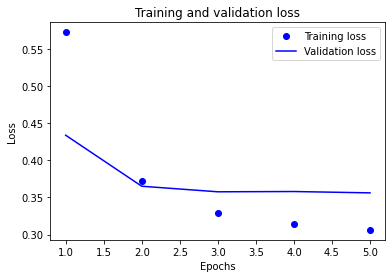

In [189]:
# loss 시각화

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

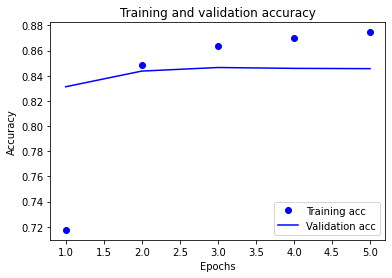

In [190]:
# accuracy 시각화
plt.clf()   # 그림을 초기화

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 실험 결과
- SentencePiece UNIGRAM 타입: loss: 0.3705 - accuracy: 0.8411
- KoNLPy 중 MeCab 적용 : loss: 0.3685 - accuracy: 0.8410
- SentencePiece BPE 타입 : loss: 0.3666 - accuracy: 0.8421

### 회고
- tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre', maxlen = 100)에서 padding을 pre 또는 post로 결정할 때, 어떤 걸로 결정하냐에 따라 성능 차이가 많이 나는 것을 확인할 수 있었음
- 그루들과 함께 진행하는 동안 모델의 complexity를 높이면 성능 향상이 보이는 것을 확인 할 수 있었음
